In [2]:
from superminddpm import DDPM, DummyEpsModel
import torch
import matplotlib.pyplot as plt

c:\Users\willd\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DDPM(eps_model=DummyEpsModel(1), betas=(1e-4, 0.02), n_T=1000)
model.load_state_dict(torch.load("./contents/ddpm_mnist.pth", map_location=device))
model.to(device)
model.eval();

Model created


In [3]:
dataset = torch.load("./datasets/1000_samples.pth")
dataset = dataset.to(device)

n = dataset.shape[0]
samples = dataset[:, 0][:, None, ...]
original_noise = dataset[:, 1][:, None, ...]
samples = samples + 0.5
labels = torch.load(f"./datasets/{n}_labels.pth")

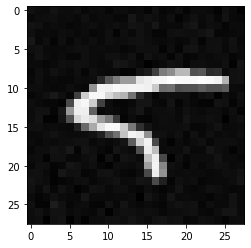

In [4]:
index = torch.randint(0, n, (1,))[0]
sample = samples[index]
starting_noise = original_noise[index]
plt.imshow(sample[0].cpu(), cmap="gray")
plt.show()

In [5]:
n_samples = 4
with torch.no_grad():
    result = model.sample(n_samples, (1, 28, 28), starting_noise=starting_noise[None, ...].repeat((n_samples, 1, 1, 1)), device=device, return_at_step=-1)
result_normalized = (result - result.min()) / (result.max() - result.min())

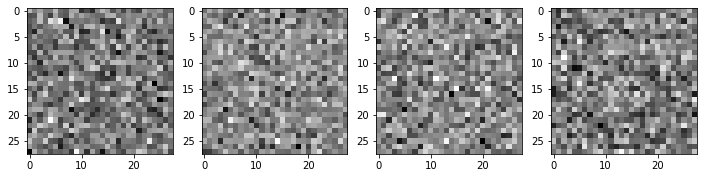

In [7]:
# Plot the four samples
fig, axs = plt.subplots(1, n_samples, figsize=(n_samples * 3, 6))
for i in range(n_samples):
    axs[i].imshow(result_normalized[i, 0].cpu(), cmap="gray")
plt.show()
